In [18]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd

In [75]:
training_data = np.loadtxt('training.txt', usecols=(0,1,2,3,4,5), skiprows=1, delimiter=',')
x_training = training_data[:, :-1]
y_training = training_data[:, -1]

testing_data = np.loadtxt('testing.txt', usecols=(0,1,2,3,4,5), skiprows=1, delimiter=',')
x_testing = testing_data[:, :-1]
y_testing = testing_data[:, -1]

feature_index_names = {0:'Words per line', 1:'Unique words per line', 2:'Token ratio', 3:'Mean word length', 4:'Total words'}


In [22]:
def scatter_plot(x, y, feature_index_names, save_figures=False):
    c = ['r', 'b','g', 'y']
    m = ['s', 'o', 'v', '+']
    s = [32, 32, 32,32]
    l = [r'$1$', r'$2$', r'$3$', r'$4$'] 
    font_size = 22
    x_class1 = x[y==1, :]
    x_class2 = x[y==2, :] 
    x_class3 = x[y==3, :]
    x_class4 = x[y==4, :] 
    for i in np.arange(len(feature_index_names)-1):
        for j in np.arange(i+1, len(feature_index_names)):
            figure_name = feature_index_names[i] + ' vs ' + feature_index_names[j]
            pl.figure(figure_name)
            pl.scatter(x_class1[:, i], x_class1[:, j], c=c[0], marker=m[0], s=s[0], label=l[0])
            pl.scatter(x_class2[:, i], x_class2[:, j], c=c[1], marker=m[1], s=s[1], label=l[1])
            pl.scatter(x_class3[:, i], x_class3[:, j], c=c[2], marker=m[2], s=s[2], label=l[2])
            pl.scatter(x_class4[:, i], x_class4[:, j], c=c[3], marker=m[3], s=s[3], label=l[3])
            pl.xlabel(feature_index_names[i], fontsize=font_size)
            pl.ylabel(feature_index_names[j], fontsize=font_size)
            pl.legend(scatterpoints=1, fontsize=font_size, loc = 'upper right')
            pl.title(figure_name, fontsize=font_size)
            pl.tight_layout()
            if save_figures:
                pl.savefig(figure_name + '.png')

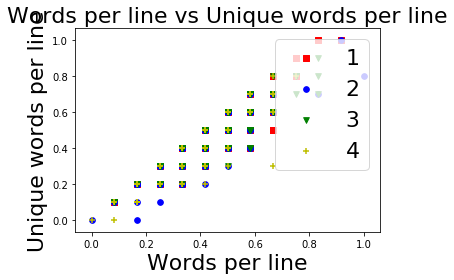

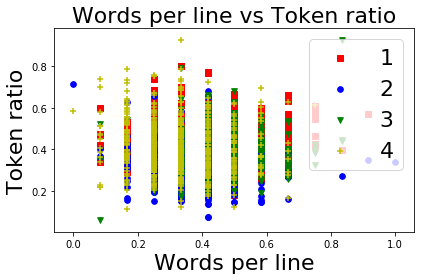

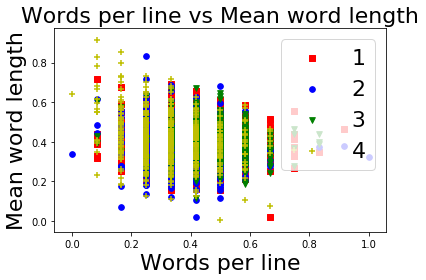

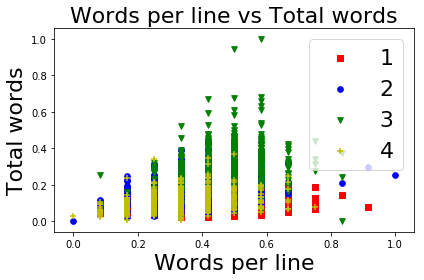

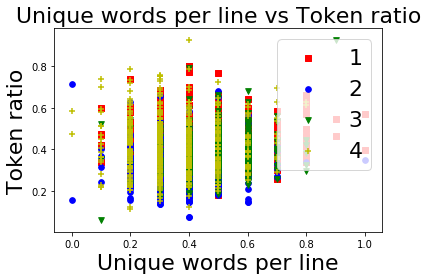

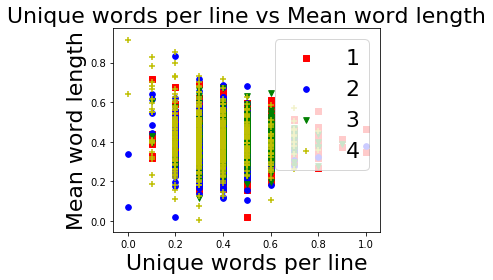

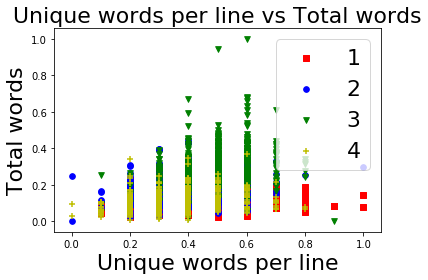

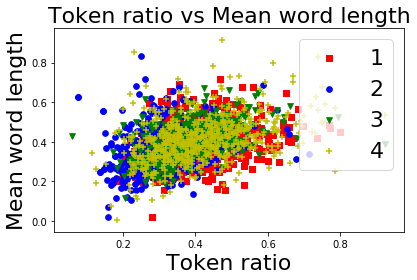

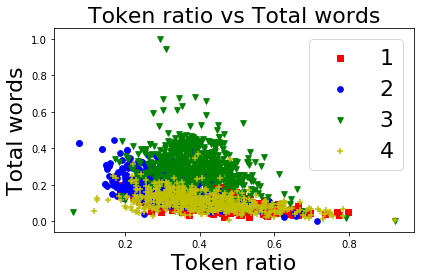

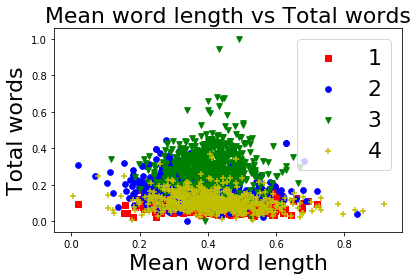

In [25]:
scatter_plot(x_training, y_training, feature_index_names)

In [26]:
def corr_coef(x, y):
    x_m = (x - np.mean(x))
    y_m = (y - np.mean(y))
    r = np.sum(x_m * y_m) / np.sqrt(np.sum(x_m**2) * np.sum(y_m**2))
    return r

In [76]:
y = y_training.copy()
for i in np.arange(len(feature_index_names)):
    x_i = x_training[:, i]
    r = corr_coef(x_i, y)    
    print('r(' + feature_index_names[i] + ', Genre) = ' + '{:.4f}'.format(r))

r(Words per line, Genre) = -0.1077
r(Unique words per line, Genre) = -0.1136
r(Token ratio, Genre) = 0.0564
r(Mean word length, Genre) = 0.0990
r(Total words, Genre) = 0.1123


In [33]:
x_testing[0]
y_testing[0]
x_q=x_testing[0]

In [86]:
def KNN(x, y, x_q, K=1):
        target_labels = np.unique(y) # unique set of target labels
        target_labels_counts = np.zeros(len(target_labels)) # keeps counts of target labels
        d = np.sqrt(np.sum((x - x_q)**2, axis=1)) # use the Euclidean distance
        j = np.argsort(d) # sort distance vector in ascending order
        for k in np.arange(len(target_labels)):
            target_labels_counts[k] = np.sum(y[j[0:K]]==target_labels[k]) # count the number of each target label in K Nearest Neighbourhood
        # apply the majority voting
        l = np.argmax(target_labels_counts)
        return target_labels[l]

In [44]:
predicted_label = KNN(x_training, y_training, x_q, K=1)
print('prediction = ' + '{:.0f}'.format(predicted_label))

prediction = 1


In [82]:
N = y_training.shape[0] # the number of examples in training dataset
print('{:>2} {:>16}'.format('K', 'Training Error'))
for K in np.arange(1, 12, 2):
    y_prediction = np.zeros(N)
    for n in np.arange(N):
        x_q = x_training[n]
        y_prediction[n] = KNN(x_training, y_training, x_q, K)
    classification_error = np.sum(y_training != y_prediction) / N
    print('{:>2.0f} {:>16.4f}'.format(K, classification_error))

 K   Training Error
 1           0.0000
 3           0.2575
 5           0.2996
 7           0.3225
 9           0.3412
11           0.3375


In [85]:
N = y_testing.shape[0] # the number of examples in training dataset
print('{:>2} {:>16}'.format('K', 'Testing Error'))
for K in np.arange(1, 12, 2):
    y_prediction = np.zeros(N)
    for n in np.arange(N):
        x_q = x_testing[n]
        y_prediction[n] = KNN(x_training, y_training, x_q, K)
    classification_error = np.sum(y_testing != y_prediction) / N
    print('{:>2.0f} {:>16.4f}'.format(K, classification_error))

 K    Testing Error
 1           0.4350
 3           0.4433
 5           0.4333
 7           0.4217
 9           0.4117
11           0.4067


In [97]:
len(x_testing)

600

In [98]:
N = x_testing.shape[0]
# K = 1
correct = 0
confusion = np.zeros((5,5))
for i in range(N):
    x_q = x_testing[i]
    predicted = KNN(x_training,y_training,x_q,1)
    pred = int(predicted)
#     print(pred)
    label = y_testing[i]
    lab = int(label)
#     print(lab)
    if (pred==lab):
        correct+=1
    confusion[pred,lab]+=1
accuracy = correct/N
print("Accuracy: %.4f" %(accuracy*100))
print("\n")
# print(composer_dict)
print("\n")
print(confusion)

Accuracy: 56.5000




[[  0.   0.   0.   0.   0.]
 [  0.  85.  33.  13.  43.]
 [  0.  16.  74.  14.  26.]
 [  0.   2.  28. 107.  10.]
 [  0.  32.  37.   7.  73.]]
